In [3]:
%load_ext autoreload
%autoreload 2

TODO:

- Add reading other ksizes
- compare "best" tissues across ksizes
- save compiled csv to s3
- if < 2GiB parquet file, save as parquet


# Step 1: Launch Jupyter Notebooks from AWS

## 1.01 Use an existing packer image

### YOU can make your own packer image

I get questions about "how can I make my own image?" and people don't realize it's much easier than they think!

- You aren't beholden to what already exists there
- If the README instructions suck, ask me or James questions and we'll try to answer them. We'll also probably tell you to fix the README for future people with the same question
- Look at the [installation script for Jupyter](https://github.com/czbiohub/packer-images/blob/master/scripts/jupyter.sh) - it's super simple. You've already used those commands on AWS so it's not a huge leap to make a packer image.

Here's the `aegea launch` command. You'll want to change `olgabot-cc-jupyter` to be your own name


```
aegea launch --ami-tags Name=czbiohub-jupyter -t t2.xlarge --security-groups='R/RStudio Server and JupyterHub' --iam-role S3fromEC2 --duration-hours 24 olgabot-cc-jupyter
```

We're using a tiny instance (`t2.xlarge` - see [all instance options](https://www.ec2instances.info/)) because it has a good amount of memory and is pretty cheap. We don't need a lot of CPUs since we'll only be running few things at a time.



#### Aegea launch errors
If you're getting an error that looks like:

```
 Mon  8 Oct - 10:31  ~ 
  aegea launch --ami-tags Name=czbiohub-jupyter -t t2.xlarge --security-groups='R/RStudio Server and JupyterHub' --iam-role S3fromEC2 --duration-hours 24 olgabot-cc-jupyter
Traceback (most recent call last):
  File "/anaconda3/bin/aegea", line 23, in <module>
    aegea.main()
  File "/anaconda3/lib/python3.6/site-packages/aegea/__init__.py", line 78, in main
    result = parsed_args.entry_point(parsed_args)
  File "/anaconda3/lib/python3.6/site-packages/aegea/launch.py", line 50, in launch
    dns_zone = DNSZone(config.dns.get("private_zone"))
  File "/anaconda3/lib/python3.6/site-packages/aegea/util/aws/__init__.py", line 183, in __init__
    raise AegeaException(msg.format(len(private_zones)))
aegea.util.exceptions.AegeaException: Found 2 private DNS zones; unable to determine zone to use. Set the dns.private_zone key in Aegea config
```


*NOTE: I found this fix by SEARCHING slack for "aegea dns". If you're getting an error, it's likely many other people are, too, so SEARCH slack if you're not getting a response on #eng-support right away*

You can do one of two things, one that will fix the problem forever or a quick fix that will only work once.


##### Edit your aegea config file so it never happens again

```
echo "dns:\n  private_zone: aegea" >> ~/.config/aegea/config.yml
```

##### Fix it just this one time

Add `--no-dns` to your `aegea launch` command before the image name (last argument):

```
aegea launch --ami-tags Name=czbiohub-jupyter -t t2.xlarge --security-groups='R/RStudio Server and JupyterHub' --iam-role S3fromEC2 --no-dns --duration-hours 24 olgabot-cc-jupyter
```


## 1.02 Log into your instance


```
aegea ssh ubuntu@olgabot-cc-jupyter
```


## 1.03 Clone my [rcfiles](https://github.com/olgabot/rcfiles) repo and run the setup

I run this one-liner for every single EC2 instance that I make. This way, every instance it has exactly my setup and all my favorite programs, color themes, commands, and aliases. Feel free to fork and edit to your own favorite programs, themes, aliases, etc.

```
git clone https://github.com/olgabot/rcfiles ~/rcfiles && cp ~/rcfiles/Makefile ~ && cd ~ && make
```

If you're curious what the file is happening, the money is in the [Makefile](https://github.com/olgabot/rcfiles/blob/master/Makefile).

## 1.04 If zsh didn't start, type `zsh`

```
zsh
```

## 1.05 Start Screen/Tmux
This will keep Jupyter notebook running forever even if your network connection breaks

Do one of:
```
screen
```
--- OR if you know `tmux` much better ---

```
tmux
```


You may need to type `zsh` again so it starts the Z shell.

## 1.06 Clone the `cupcakes` and `kmer-hashing` repositories

Now you'll have this notebook running on AWS!

```
git clone https://github.com/czbiohub/cupcakes/
```


## 1.07 Install the requirements

```
conda env update --name root --file cupcakes/2018/olgas_bioinformagician_tricks/environment.yml
```


## 1.08 Launch jupyter notebook


```
jupyter notebook
```

## 1.09 Open another tab in your terminal with Command-T

Multiple tabs >> (are much better than)  multiple windows because it's much easier to navigate between them

- `Command-Shift-[` moves one tab to the left
- `Command-Shift-]` moves one tab to the right


## 1.10 Tunnel the notebook from AWS to your computer

This binds the remote port `8888` to your local port `8877`

```
aegea ssh ubuntu@olgabot-cc-jupyter -NL localhost:8877:localhost:8888 
```

## 1.11 Go to http://localhost:8877 on your laptop

The password is the same as the InnerHub wifi password.

## 1.12 Navigate to the cupcakes/2018 folder

- Open `001_how_to_be_a_bioinformagician_part01.ipynb`

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
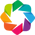

In [1]:
# Standard convention is to import python standard libraries first, then third-party libraries after that
# See list of standard libraries here: https://docs.python.org/3/library/
# Both import lists should be alphabetically sorted

# --- Python standard library --- #
import glob
import os

# --- Third-party (non-standard Python) libraries --- #
# Interactive visualizations
import holoviews as hv
hv.extension('bokeh')

# Commonly used library for plotting
import matplotlib.pyplot as plt

# Numerical python - arrays, nans
import numpy as np

# python dataframes. very similar to R dataframes
import pandas as pd

# Make the number of characters allowed per column super big since our filenames are long
pd.options.display.max_colwidth = 500

# Reminder to install pyarrow for parquet read/write
import pyarrow

# Reminder to install s3fs to read files from aws
import s3fs

# static visualizations. ggplot2-like
import seaborn as sns

# Nice status bar for 'for' loops
import tqdm

# Show figures inside the notebook
%matplotlib inline

In [6]:


compute_samples = pd.read_csv('../sourmash/lung_cancer_v4/compute/samples.csv')
print(compute_samples.shape)
compute_samples.head()

FileNotFoundError: File b'../sourmash/lung_cancer_v4/compute/samples.csv' does not exist

Cannot have latest version of `awscli` ... there is a bug


    pip install awscli==1.15.83

In [127]:
! aws s3 ls s3://olgabot-maca/lung_cancer/sourmash_search/

                           PRE tabula-muris-k51-protein/


In [20]:
prefix = 's3://olgabot-maca/lung_cancer/sourmash_search/tabula-muris-k51-protein'
txt = 'lung_cancer_sourmash_search.txt'

! aws s3 ls $prefix/ > $txt
! cat $txt

2018-09-23 17:08:15    6961355 C14_B003528_S62_ignore-abundance=False.csv
2018-09-23 19:56:00    7018975 C14_B003528_S62_ignore-abundance=True.csv
2018-09-23 19:39:46    6978189 D1_B003125_S25_ignore-abundance=False.csv
2018-09-23 17:01:30    7034849 D1_B003125_S25_ignore-abundance=True.csv
2018-09-23 19:48:12    6957176 E19_B003570_S199_ignore-abundance=False.csv
2018-09-23 17:01:30    7013981 E19_B003570_S199_ignore-abundance=True.csv
2018-09-23 19:01:31    6971121 F21_B000420_S213_ignore-abundance=False.csv
2018-09-23 17:04:16    7017638 F21_B000420_S213_ignore-abundance=True.csv
2018-09-23 19:40:25    6977765 G10_B003586_S142_ignore-abundance=False.csv
2018-09-23 17:04:44    7014175 G10_B003586_S142_ignore-abundance=True.csv
2018-09-23 17:01:30    6951301 G4_B003570_S232_ignore-abundance=False.csv
2018-09-23 17:10:04    7020021 G4_B003570_S232_ignore-abundance=True.csv
2018-09-23 19:51:21    6983895 G9_B003511_S57_ignore-abundance=False.csv
2018-09-23 17:05:12    7013917 G9_B003511

In [21]:
aws_s3_ls = pd.read_table(txt, 
                          delim_whitespace=True, header=None, 
                          names=['date', 'time', 'bytes', 'basename'])
print(aws_s3_ls.shape)
aws_s3_ls.head()

(41, 4)


date      time    bytes                                     basename
0  2018-09-23  17:08:15  6961355   C14_B003528_S62_ignore-abundance=False.csv
1  2018-09-23  19:56:00  7018975    C14_B003528_S62_ignore-abundance=True.csv
2  2018-09-23  19:39:46  6978189    D1_B003125_S25_ignore-abundance=False.csv
3  2018-09-23  17:01:30  7034849     D1_B003125_S25_ignore-abundance=True.csv
4  2018-09-23  19:48:12  6957176  E19_B003570_S199_ignore-abundance=False.csv

In [24]:
df = pd.read_csv(f'{prefix}/D1_B003125_S25_ignore-abundance=False.csv')
print(df.shape)
df.head()

(36616, 4)


similarity  \
0    0.316674   
1    0.308141   
2    0.307184   
3    0.304018   
4    0.302058   

                                                                                                                name  \
0            cell_ontology_class:T_cell|tissue:Fat|subtissue:MAT|free_annotation:nan|cell_id:G16-MAA000914-3_9_M-1-1   
1            cell_ontology_class:T_cell|tissue:Fat|subtissue:MAT|free_annotation:nan|cell_id:E11-MAA000914-3_9_M-1-1   
2            cell_ontology_class:T_cell|tissue:Fat|subtissue:MAT|free_annotation:nan|cell_id:D12-MAA000914-3_9_M-1-1   
3  cell_ontology_class:endothelial_cell|tissue:Fat|subtissue:MAT|free_annotation:nan|cell_id:D17-MAA000914-3_9_M-1-1   
4            cell_ontology_class:T_cell|tissue:Fat|subtissue:MAT|free_annotation:nan|cell_id:H14-MAA000914-3_9_M-1-1   

                   filename                               md5  
0  tabula-muris-k51-protein  7eaedc3ea86056aca4353152544cfff4  
1  tabula-muris-k51-protein  9c2251f947b9a9faf1cad898f2b1a0a1  
2  tabula-muris-k51-protein  942b9c25aed5b57d64572cdcbd8d3343  
3  tabula-muris-k51-protein  5e9de85eef4edef22566bb3eb1efc23b  
4  tabula-muris-k51-protein  2e4adc68cd4fd8e1c6119571c859ca71

In [25]:
pattern = '(?P<sample_id>[\w]+)_ignore-abundance=(?P<ignore_abundance>True|False).csv'

sample_id_abundance = aws_s3_ls.basename.str.extract(pattern)
print(sample_id_abundance.shape)
sample_id_abundance.head()

(41, 2)


sample_id ignore_abundance
0   C14_B003528_S62            False
1   C14_B003528_S62             True
2    D1_B003125_S25            False
3    D1_B003125_S25             True
4  E19_B003570_S199            False

In [26]:
sorted(sample_id_abundance.sample_id.values)

['C14_B003528_S62',
 'C14_B003528_S62',
 'D1_B003125_S25',
 'D1_B003125_S25',
 'E19_B003570_S199',
 'E19_B003570_S199',
 'F21_B000420_S213',
 'F21_B000420_S213',
 'G10_B003586_S142',
 'G10_B003586_S142',
 'G4_B003570_S232',
 'G4_B003570_S232',
 'G9_B003511_S57',
 'G9_B003511_S57',
 'H7_B003588_S211',
 'H7_B003588_S211',
 'I22_B002095_S22',
 'I22_B002095_S22',
 'I3_B003573_S63',
 'I3_B003573_S63',
 'J11_B003573_S95',
 'J11_B003573_S95',
 'J8_B003528_S224',
 'J8_B003528_S224',
 'K7_B002073_S103',
 'K7_B002073_S103',
 'L16_B003588_S16',
 'L16_B003588_S16',
 'L5_B003588_S5',
 'L5_B003588_S5',
 'M1_B000420_S61',
 'M1_B000420_S61',
 'M23_B002097_S251',
 'M23_B002097_S251',
 'N15_B000420_S99',
 'O3_B003573_S207',
 'O3_B003573_S207',
 'P14_B000420_S146',
 'P14_B000420_S146',
 'P2_B003125_S14',
 'P2_B003125_S14']

In [27]:
aws_s3_ls_ids = pd.concat([aws_s3_ls, sample_id_abundance], axis=1)
aws_s3_ls_ids.head()

date      time    bytes                                     basename  \
0  2018-09-23  17:08:15  6961355   C14_B003528_S62_ignore-abundance=False.csv   
1  2018-09-23  19:56:00  7018975    C14_B003528_S62_ignore-abundance=True.csv   
2  2018-09-23  19:39:46  6978189    D1_B003125_S25_ignore-abundance=False.csv   
3  2018-09-23  17:01:30  7034849     D1_B003125_S25_ignore-abundance=True.csv   
4  2018-09-23  19:48:12  6957176  E19_B003570_S199_ignore-abundance=False.csv   

          sample_id ignore_abundance  
0   C14_B003528_S62            False  
1   C14_B003528_S62             True  
2    D1_B003125_S25            False  
3    D1_B003125_S25             True  
4  E19_B003570_S199            False

## Use `tqdm` to show a status bar

In [28]:
dfs = []

for i, row in tqdm(aws_s3_ls_ids.iterrows()):
    basename = row.basename
    sample_id = basename.split()
    df = pd.read_csv(f'{prefix}/{basename}')
    df['query_sample_id'] = row.sample_id
    df['ignore_abundance'] = row.ignore_abundance
    dfs.append(df)
search_results = pd.concat(dfs, ignore_index=True)
print(search_results.shape)
search_results.head()

(1500684, 6)


similarity  \
0    0.500983   
1    0.500967   
2    0.500855   
3    0.500827   
4    0.500819   

                                                                                                                                                                                      name  \
0                                                                             cell_ontology_class:myeloid_cell|tissue:Fat|subtissue:MAT|free_annotation:nan|cell_id:H11-B002314-3_56_F-1-1   
1  cell_ontology_class:epithelial_cell_of_large_intestine|tissue:Large_Intestine|subtissue:Proximal|free_annotation:Lgr5-_amplifying_undifferentiated_cell|cell_id:H6-MAA001871-3_39_F-1-1   
2                         cell_ontology_class:large_intestine_goblet_cell|tissue:Large_Intestine|subtissue:Proximal|free_annotation:Goblet_cell_(Proximal)|cell_id:M4-MAA001872-3_39_F-1-1   
3                         cell_ontology_class:large_intestine_goblet_cell|tissue:Large_Intestine|subtissue:Proximal|free_annotation:Goblet_cell_(Proximal)|cell_id:E6-MAA001872-3_39_F-1-1   
4                        cell_ontology_class:large_intestine_goblet_cell|tissue:Large_Intestine|subtissue:Proximal|free_annotation:Goblet_cell_(Proximal)|cell_id:L12-MAA001872-3_39_F-1-1   

                   filename                               md5  \
0  tabula-muris-k51-protein  3117952b86d451cb92e6336531316c17   
1  tabula-muris-k51-protein  3c5b05b218dc4bfdc197426bc838fed8   
2  tabula-muris-k51-protein  64ef4f62c0d0b1377c2cbf5f135f314f   
3  tabula-muris-k51-protein  e4a3ceeaeff81c54fe23210e460e6ded   
4  tabula-muris-k51-protein  a8a5aa310cbb862741fc88fac1052c32   

   query_sample_id ignore_abundance  
0  C14_B003528_S62            False  
1  C14_B003528_S62            False  
2  C14_B003528_S62            False  
3  C14_B003528_S62            False  
4  C14_B003528_S62            False

In [29]:
pattern = '(?P<column>\w+):(?P<value>[\w-]+)'

df = search_results.name.head().str.extractall(pattern)
df.reset_index().pivot(index='level_0', columns='column', values='value')

column                    cell_id                 cell_ontology_class  \
level_0                                                                 
0          H11-B002314-3_56_F-1-1                        myeloid_cell   
1         H6-MAA001871-3_39_F-1-1  epithelial_cell_of_large_intestine   
2         M4-MAA001872-3_39_F-1-1         large_intestine_goblet_cell   
3         E6-MAA001872-3_39_F-1-1         large_intestine_goblet_cell   
4        L12-MAA001872-3_39_F-1-1         large_intestine_goblet_cell   

column                          free_annotation subtissue           tissue  
level_0                                                                     
0                                           nan       MAT              Fat  
1        Lgr5-_amplifying_undifferentiated_cell  Proximal  Large_Intestine  
2                                  Goblet_cell_  Proximal  Large_Intestine  
3                                  Goblet_cell_  Proximal  Large_Intestine  
4                                  Goblet_cell_  Proximal  Large_Intestine

In [30]:
%%file extract_metadata.py
import pandas as pd

def combine_cell_ontology_free_annotation(row):
    if pd.notnull(row['free_annotation']):
        return '{cell_ontology_class} ({free_annotation})'.format(**row)
    else:
        return row['cell_ontology_class']


def extract_cell_metadata(name_column, pattern='(?P<column>\w+):(?P<value>[\w-]+)'):
    expanded = name_column.str.extractall(pattern)
    expanded_index = expanded.reset_index()
    annotations = expanded_index.pivot(columns='column', values='value', index='level_0')
    annotations['cell_ontology_free_annotation'] = annotations.apply(
        combine_cell_ontology_free_annotation, axis=1)
    return annotations 


def to_key_value_pair(attribute):
    if len(attribute) > 1:
        try:
            return attribute[0], int(attribute[1])
        except ValueError:
            return attribute[0], attribute[1] 
    else:
        return 'comparison_sequence', attribute[0]


def extract_experiment_metadata(basename):
    key = basename.split('.csv')[0]
    split = key.split('_')
    attributes = [x.split('=') for x in split]
    attributes = dict(to_key_value_pair(x) for x in attributes)
    return key, attributes

Overwriting extract_metadata.py


In [31]:
import extract_metadata

cell_metadata = extract_metadata.extract_cell_metadata(search_results.name)
print(cell_metadata.shape)
cell_metadata.head()

(1210115, 6)


column                    cell_id                 cell_ontology_class  \
level_0                                                                 
0          H11-B002314-3_56_F-1-1                        myeloid_cell   
1         H6-MAA001871-3_39_F-1-1  epithelial_cell_of_large_intestine   
2         M4-MAA001872-3_39_F-1-1         large_intestine_goblet_cell   
3         E6-MAA001872-3_39_F-1-1         large_intestine_goblet_cell   
4        L12-MAA001872-3_39_F-1-1         large_intestine_goblet_cell   

column                          free_annotation subtissue           tissue  \
level_0                                                                      
0                                           nan       MAT              Fat   
1        Lgr5-_amplifying_undifferentiated_cell  Proximal  Large_Intestine   
2                                  Goblet_cell_  Proximal  Large_Intestine   
3                                  Goblet_cell_  Proximal  Large_Intestine   
4                                  Goblet_cell_  Proximal  Large_Intestine   

column                                                 cell_ontology_free_annotation  
level_0                                                                               
0                                                                 myeloid_cell (nan)  
1        epithelial_cell_of_large_intestine (Lgr5-_amplifying_undifferentiated_cell)  
2                                         large_intestine_goblet_cell (Goblet_cell_)  
3                                         large_intestine_goblet_cell (Goblet_cell_)  
4                                         large_intestine_goblet_cell (Goblet_cell_)

In [32]:
search_results_metadata = search_results.join(cell_metadata)
print(search_results_metadata.shape)
search_results_metadata.head()

(1500684, 12)


similarity  \
0    0.500983   
1    0.500967   
2    0.500855   
3    0.500827   
4    0.500819   

                                                                                                                                                                                      name  \
0                                                                             cell_ontology_class:myeloid_cell|tissue:Fat|subtissue:MAT|free_annotation:nan|cell_id:H11-B002314-3_56_F-1-1   
1  cell_ontology_class:epithelial_cell_of_large_intestine|tissue:Large_Intestine|subtissue:Proximal|free_annotation:Lgr5-_amplifying_undifferentiated_cell|cell_id:H6-MAA001871-3_39_F-1-1   
2                         cell_ontology_class:large_intestine_goblet_cell|tissue:Large_Intestine|subtissue:Proximal|free_annotation:Goblet_cell_(Proximal)|cell_id:M4-MAA001872-3_39_F-1-1   
3                         cell_ontology_class:large_intestine_goblet_cell|tissue:Large_Intestine|subtissue:Proximal|free_annotation:Goblet_cell_(Proximal)|cell_id:E6-MAA001872-3_39_F-1-1   
4                        cell_ontology_class:large_intestine_goblet_cell|tissue:Large_Intestine|subtissue:Proximal|free_annotation:Goblet_cell_(Proximal)|cell_id:L12-MAA001872-3_39_F-1-1   

                   filename                               md5  \
0  tabula-muris-k51-protein  3117952b86d451cb92e6336531316c17   
1  tabula-muris-k51-protein  3c5b05b218dc4bfdc197426bc838fed8   
2  tabula-muris-k51-protein  64ef4f62c0d0b1377c2cbf5f135f314f   
3  tabula-muris-k51-protein  e4a3ceeaeff81c54fe23210e460e6ded   
4  tabula-muris-k51-protein  a8a5aa310cbb862741fc88fac1052c32   

   query_sample_id ignore_abundance                   cell_id  \
0  C14_B003528_S62            False    H11-B002314-3_56_F-1-1   
1  C14_B003528_S62            False   H6-MAA001871-3_39_F-1-1   
2  C14_B003528_S62            False   M4-MAA001872-3_39_F-1-1   
3  C14_B003528_S62            False   E6-MAA001872-3_39_F-1-1   
4  C14_B003528_S62            False  L12-MAA001872-3_39_F-1-1   

                  cell_ontology_class                         free_annotation  \
0                        myeloid_cell                                     nan   
1  epithelial_cell_of_large_intestine  Lgr5-_amplifying_undifferentiated_cell   
2         large_intestine_goblet_cell                            Goblet_cell_   
3         large_intestine_goblet_cell                            Goblet_cell_   
4         large_intestine_goblet_cell                            Goblet_cell_   

  subtissue           tissue  \
0       MAT              Fat   
1  Proximal  Large_Intestine   
2  Proximal  Large_Intestine   
3  Proximal  Large_Intestine   
4  Proximal  Large_Intestine   

                                                 cell_ontology_free_annotation  
0                                                           myeloid_cell (nan)  
1  epithelial_cell_of_large_intestine (Lgr5-_amplifying_undifferentiated_cell)  
2                                   large_intestine_goblet_cell (Goblet_cell_)  
3                                   large_intestine_goblet_cell (Goblet_cell_)  
4                                   large_intestine_goblet_cell (Goblet_cell_)

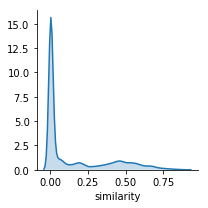

In [33]:
import seaborn as sns
%matplotlib inline

g = sns.FacetGrid(search_results)
g.map(sns.kdeplot, 'similarity', shade=True)

In [2]:
import seaborn as sns
%matplotlib inline

g = sns.FacetGrid(search_results, hue='tissue')
g.map(sns.kdeplot, 'similarity', shade=True)

NameError: name 'search_results' is not defined

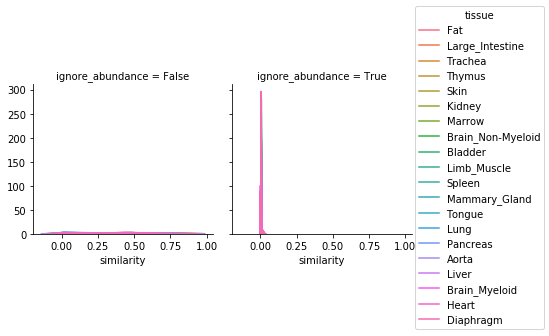

In [35]:
import seaborn as sns
%matplotlib inline

g = sns.FacetGrid(search_results_metadata, col='ignore_abundance', hue='tissue')
g.map(sns.kdeplot, 'similarity', shade=True)
g.add_legend()

In [53]:
grouped = search_results_metadata.groupby(['query_sample_id', 'ignore_abundance'])

n = 100

search_results_metadata_topn_per_cell = grouped.apply(lambda x: x.nlargest(100, 'similarity'))
print(search_results_metadata_topn_per_cell.shape)
search_results_metadata_topn_per_cell.head()

(4100, 12)


similarity  \
query_sample_id ignore_abundance                 
C14_B003528_S62 False            0    0.500983   
                                 1    0.500967   
                                 2    0.500855   
                                 3    0.500827   
                                 4    0.500819   

                                                                                                                                                                                                                       name  \
query_sample_id ignore_abundance                                                                                                                                                                                              
C14_B003528_S62 False            0                                                                             cell_ontology_class:myeloid_cell|tissue:Fat|subtissue:MAT|free_annotation:nan|cell_id:H11-B002314-3_56_F-1-1   
                                 1  cell_ontology_class:epithelial_cell_of_large_intestine|tissue:Large_Intestine|subtissue:Proximal|free_annotation:Lgr5-_amplifying_undifferentiated_cell|cell_id:H6-MAA001871-3_39_F-1-1   
                                 2                         cell_ontology_class:large_intestine_goblet_cell|tissue:Large_Intestine|subtissue:Proximal|free_annotation:Goblet_cell_(Proximal)|cell_id:M4-MAA001872-3_39_F-1-1   
                                 3                         cell_ontology_class:large_intestine_goblet_cell|tissue:Large_Intestine|subtissue:Proximal|free_annotation:Goblet_cell_(Proximal)|cell_id:E6-MAA001872-3_39_F-1-1   
                                 4                        cell_ontology_class:large_intestine_goblet_cell|tissue:Large_Intestine|subtissue:Proximal|free_annotation:Goblet_cell_(Proximal)|cell_id:L12-MAA001872-3_39_F-1-1   

                                                    filename  \
query_sample_id ignore_abundance                               
C14_B003528_S62 False            0  tabula-muris-k51-protein   
                                 1  tabula-muris-k51-protein   
                                 2  tabula-muris-k51-protein   
                                 3  tabula-muris-k51-protein   
                                 4  tabula-muris-k51-protein   

                                                                 md5  \
query_sample_id ignore_abundance                                       
C14_B003528_S62 False            0  3117952b86d451cb92e6336531316c17   
                                 1  3c5b05b218dc4bfdc197426bc838fed8   
                                 2  64ef4f62c0d0b1377c2cbf5f135f314f   
                                 3  e4a3ceeaeff81c54fe23210e460e6ded   
                                 4  a8a5aa310cbb862741fc88fac1052c32   

                                    query_sample_id ignore_abundance  \
query_sample_id ignore_abundance                                       
C14_B003528_S62 False            0  C14_B003528_S62            False   
                                 1  C14_B003528_S62            False   
                                 2  C14_B003528_S62            False   
                                 3  C14_B003528_S62            False   
                                 4  C14_B003528_S62            False   

                                                     cell_id  \
query_sample_id ignore_abundance                               
C14_B003528_S62 False            0    H11-B002314-3_56_F-1-1   
                                 1   H6-MAA001871-3_39_F-1-1   
                                 2   M4-MAA001872-3_39_F-1-1   
                                 3   E6-MAA001872-3_39_F-1-1   
                                 4  L12-MAA001872-3_39_F-1-1   

                                                   cell_ontology_class  \
query_sample_id ignore_abundance                                         
C14_B003528_S62 False            0                        myeloid_c

In [60]:
grouped.apply(lambda x: x.nlargest(100, 'similarity')['cell_ontology_class'].mode())

query_sample_id   ignore_abundance   
C14_B003528_S62   False             0             epithelial_cell_of_large_intestine
                  True              0             epithelial_cell_of_large_intestine
D1_B003125_S25    False             0               mesenchymal_stem_cell_of_adipose
                  True              0                         pancreatic_acinar_cell
E19_B003570_S199  False             0             epithelial_cell_of_large_intestine
                  True              0                                     basal_cell
F21_B000420_S213  False             0                                         B_cell
                  True              0             epithelial_cell_of_large_intestine
G4_B003570_S232   False             0             epithelial_cell_of_large_intestine
                  True              0             epithelial_cell_of_large_intestine
G9_B003511_S57    True              0                                oligodendrocyte
H7_B003588_S211   False    

In [128]:
grouped.apply(lambda x: x.nlargest(100, 'similarity')['tissue'].mode())

query_sample_id   ignore_abundance   
C14_B003528_S62   False             0      Large_Intestine
                  True              0      Large_Intestine
D1_B003125_S25    False             0                  Fat
                  True              0             Pancreas
E19_B003570_S199  False             0      Large_Intestine
                  True              0        Mammary_Gland
F21_B000420_S213  False             0               Spleen
                  True              0                  Fat
G4_B003570_S232   False             0      Large_Intestine
                  True              0      Large_Intestine
G9_B003511_S57    True              0    Brain_Non-Myeloid
H7_B003588_S211   False             0      Large_Intestine
                  True              0      Large_Intestine
I22_B002095_S22   False             0      Large_Intestine
                  True              0               Marrow
I3_B003573_S63    False             0                Heart
                  

/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


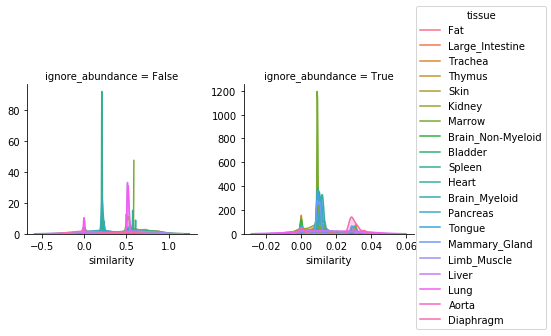

In [59]:
import seaborn as sns
%matplotlib inline

g = sns.FacetGrid(search_results_metadata_topn_per_cell, col='ignore_abundance', hue='tissue', 
                  sharex=False, sharey=False)
g.map(sns.kdeplot, 'similarity', shade=True)
g.add_legend()
# g.set(xlim=(0, 1), ylim=(0, 100))

In [55]:
search_results_metadata_topn_per_cell.cell_ontology_class.mode()

0    epithelial_cell_of_large_intestine
dtype: object

In [65]:
cols = ['query_sample_id', 'ignore_abundance']

search_results_metadata_topn_per_cell.groupby(cols, squeeze=True).apply(lambda x: x['cell_ontology_class'].mode()).reset_index()

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: 'query_sample_id' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  app.launch_new_instance()
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: 'ignore_abundance' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  app.launch_new_instance()


query_sample_id ignore_abundance  level_2  \
0    C14_B003528_S62            False        0   
1    C14_B003528_S62             True        0   
2     D1_B003125_S25            False        0   
3     D1_B003125_S25             True        0   
4   E19_B003570_S199            False        0   
5   E19_B003570_S199             True        0   
6   F21_B000420_S213            False        0   
7   F21_B000420_S213             True        0   
8    G4_B003570_S232            False        0   
9    G4_B003570_S232             True        0   
10    G9_B003511_S57             True        0   
11   H7_B003588_S211            False        0   
12   H7_B003588_S211             True        0   
13   I22_B002095_S22            False        0   
14   I22_B002095_S22             True        0   
15    I3_B003573_S63            False        0   
16    I3_B003573_S63             True        0   
17   J11_B003573_S95            False        0   
18   J11_B003573_S95             True        0   
19   J8_B003528_S224            False        0   
20   J8_B003528_S224             True        0   
21   K7_B002073_S103            False        0   
22   K7_B002073_S103             True        0   
23   L16_B003588_S16            False        0   
24   L16_B003588_S16             True        0   
25     L5_B003588_S5            False        0   
26     L5_B003588_S5             True        0   
27    M1_B000420_S61            False        0   
28    M1_B000420_S61             True        0   
29  M23_B002097_S251            False        0   
30  M23_B002097_S251             True        0   
31   N15_B000420_S99            False        0   
32   O3_B003573_S207            False        0   
33   O3_B003573_S207             True        0   
34  P14_B000420_S146            False        0   
35  P14_B000420_S146             True        0   
36    P2_B003125_S14            False        0   
37    P2_B003125_S14             True        0   

                                              0  
0            epithelial_cell_of_large_intestine  
1            epithelial_cell_of_large_intestine  
2              mesenchymal_stem_cell_of_adipose  
3                        pancreatic_acinar_cell  
4            epithelial_cell_of_large_intestine  
5                                    basal_cell  
6                                        B_cell  
7            epithelial_cell_of_large_intestine  
8            epithelial_cell_of_large_intestine  
9            epithelial_cell_of_large_intestine  
10                              oligodendrocyte  
11           epithelial_cell_of_large_intestine  
12           epithelial_cell_of_large_intestine  
13           epithelial_cell_of_large_intestine  
14  Slamf1-negative_multipotent_progenitor_cell  
15                                    leukocyte  
16                                 myeloid_cell  
17           epithelial_cell_of_large_intestine  
18           epithelial_cell_of_large_intestine  
19           epithelial_cell_of_large_intestine  
20           epithelial_cell_of_large_intestine  
21           epithelial_cell_of_large_intestine  
22                                       B_cell  
23           epithelial_cell_of_large_intestine  
24           epithelial_cell_of_large_intestine  
25           epithelial_cell_of_large_intestine  
26           epithelial_cell_of_large_intestine  
27           epithelial_cell_of_large_intestine  
28           epithelial_cell_of_large_intestine  
29                             endothelial_cell  
30                             endothelial_cell  
31           epithelial_cell_of_large_intestine  
32           epithelial_cell_of_large_intestine  
33           epithelial_cell_of_large_intestine  
34           epithelial_cell_of_large_intestine  
35           epithelial_cell_of_large_intestine  
36           epithelial_cell_of_large_intestine  
37           epithelial_cell_of_large_intestine

In [66]:
search_results_metadata_topn_per_cell.groupby(cols, squeeze=True).apply(lambda x: x['tissue'].mode()).reset_index()

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: 'query_sample_id' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: 'ignore_abundance' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  if __name__ == '__main__':


query_sample_id ignore_abundance  level_2                  0
0    C14_B003528_S62            False        0    Large_Intestine
1    C14_B003528_S62             True        0    Large_Intestine
2     D1_B003125_S25            False        0                Fat
3     D1_B003125_S25             True        0           Pancreas
4   E19_B003570_S199            False        0    Large_Intestine
5   E19_B003570_S199             True        0      Mammary_Gland
6   F21_B000420_S213            False        0             Spleen
7   F21_B000420_S213             True        0                Fat
8    G4_B003570_S232            False        0    Large_Intestine
9    G4_B003570_S232             True        0    Large_Intestine
10    G9_B003511_S57             True        0  Brain_Non-Myeloid
11   H7_B003588_S211            False        0    Large_Intestine
12   H7_B003588_S211             True        0    Large_Intestine
13   I22_B002095_S22            False        0    Large_Intestine
14   I22_B002095_S22             True        0             Marrow
15    I3_B003573_S63            False        0              Heart
16    I3_B003573_S63             True        0                Fat
17   J11_B003573_S95            False        0    Large_Intestine
18   J11_B003573_S95             True        0    Large_Intestine
19   J8_B003528_S224            False        0    Large_Intestine
20   J8_B003528_S224             True        0    Large_Intestine
21   K7_B002073_S103            False        0    Large_Intestine
22   K7_B002073_S103             True        0             Spleen
23   L16_B003588_S16            False        0    Large_Intestine
24   L16_B003588_S16             True        0    Large_Intestine
25     L5_B003588_S5            False        0    Large_Intestine
26     L5_B003588_S5             True        0    Large_Intestine
27    M1_B000420_S61            False        0    Large_Intestine
28    M1_B000420_S61             True        0    Large_Intestine
29  M23_B002097_S251            False        0             Marrow
30  M23_B002097_S251             True        0             Marrow
31   N15_B000420_S99            False        0    Large_Intestine
32   O3_B003573_S207            False        0    Large_Intestine
33   O3_B003573_S207             True        0    Large_Intestine
34  P14_B000420_S146            False        0    Large_Intestine
35  P14_B000420_S146             True        0    Large_Intestine
36    P2_B003125_S14            False        0    Large_Intestine
37    P2_B003125_S14             True        0    Large_Intestine

### Use only cells with a median similarity to somthing > 0.5

In [36]:
search_results_metadata_top = search_results_metadata.groupby('query_sample_id').filter(
    lambda x: x['similarity'].median() > 0.5)
print(search_results_metadata_top.shape)
search_results_metadata_top.head()

(36616, 12)


similarity  \
1244944    0.752688   
1244945    0.752443   
1244946    0.751850   
1244947    0.751796   
1244948    0.751449   

                                                                                                                         name  \
1244944          cell_ontology_class:myeloid_cell|tissue:Fat|subtissue:MAT|free_annotation:nan|cell_id:H11-B002314-3_56_F-1-1   
1244945  cell_ontology_class:epithelial_cell|tissue:Trachea|subtissue:nan|free_annotation:nan|cell_id:O4-MAA001867-3_39_F-1-1   
1244946                                                                                                  L5-D042475-3_9_M-1-1   
1244947  cell_ontology_class:epithelial_cell|tissue:Trachea|subtissue:nan|free_annotation:nan|cell_id:J2-MAA001865-3_38_F-1-1   
1244948                                                                                              L12-MAA001865-3_38_F-1-1   

                         filename                               md5  \
1244944  tabula-muris-k51-protein  3117952b86d451cb92e6336531316c17   
1244945  tabula-muris-k51-protein  effaec44fd29a68d032969c3a4300db1   
1244946  tabula-muris-k51-protein  7dd0b9383b69726cc374fc0abb56d253   
1244947  tabula-muris-k51-protein  7204e7113d68c3bf08898ca38ba518cd   
1244948  tabula-muris-k51-protein  8ed1bcbf788adeb64c9ca50a651c8058   

         query_sample_id ignore_abundance                  cell_id  \
1244944  N15_B000420_S99            False   H11-B002314-3_56_F-1-1   
1244945  N15_B000420_S99            False  O4-MAA001867-3_39_F-1-1   
1244946  N15_B000420_S99            False                      NaN   
1244947  N15_B000420_S99            False  J2-MAA001865-3_38_F-1-1   
1244948  N15_B000420_S99            False                      NaN   

        cell_ontology_class free_annotation subtissue   tissue  \
1244944        myeloid_cell             nan       MAT      Fat   
1244945     epithelial_cell             nan       nan  Trachea   
1244946                 NaN             NaN       NaN      NaN   
1244947     epithelial_cell             nan       nan  Trachea   
1244948                 NaN             NaN       NaN      NaN   

        cell_ontology_free_annotation  
1244944            myeloid_cell (nan)  
1244945         epithelial_cell (nan)  
1244946                           NaN  
1244947         epithelial_cell (nan)  
1244948                           NaN

In [37]:
grouped = search_results_metadata_top.groupby('query_sample_id')

cols = ['similarity', 'tissue', 'cell_ontology_class']

grouped.apply(lambda x: x.nlargest(5, 'similarity')[cols])

similarity   tissue cell_ontology_class
query_sample_id                                                 
N15_B000420_S99 1244944    0.752688      Fat        myeloid_cell
                1244945    0.752443  Trachea     epithelial_cell
                1244946    0.751850      NaN                 NaN
                1244947    0.751796  Trachea     epithelial_cell
                1244948    0.751449      NaN                 NaN

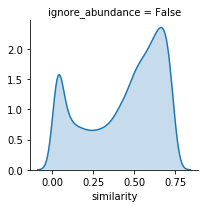

In [38]:
import seaborn as sns
%matplotlib inline

g = sns.FacetGrid(search_results_metadata_top, col='ignore_abundance')
g.map(sns.kdeplot, 'similarity', shade=True)

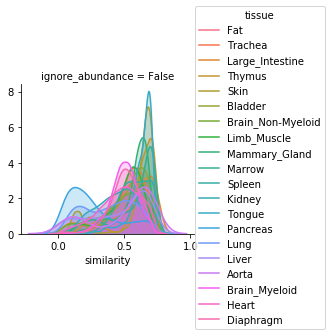

In [39]:
import seaborn as sns
%matplotlib inline

g = sns.FacetGrid(search_results_metadata_top, col='ignore_abundance', hue='tissue')
g.map(sns.kdeplot, 'similarity', shade=True)
g.add_legend()


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
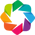

In [81]:

import holoviews as hv
hv.extension('bokeh')

In [82]:
# search_results_metadata_hv = hv.Table(search_results_metadata)

In [83]:
# hv.Distribution(search_results_metadata_hv, kdims=['tissue'], vdims=['similarity'])

In [84]:
data = {name: hv.Distribution(df['similarity']) 
              for name, df in search_results_metadata_top.groupby('tissue')}
data

{'Aorta': :Distribution   [similarity]   (Density),
 'Bladder': :Distribution   [similarity]   (Density),
 'Brain_Myeloid': :Distribution   [similarity]   (Density),
 'Brain_Non-Myeloid': :Distribution   [similarity]   (Density),
 'Diaphragm': :Distribution   [similarity]   (Density),
 'Fat': :Distribution   [similarity]   (Density),
 'Heart': :Distribution   [similarity]   (Density),
 'Kidney': :Distribution   [similarity]   (Density),
 'Large_Intestine': :Distribution   [similarity]   (Density),
 'Limb_Muscle': :Distribution   [similarity]   (Density),
 'Liver': :Distribution   [similarity]   (Density),
 'Lung': :Distribution   [similarity]   (Density),
 'Mammary_Gland': :Distribution   [similarity]   (Density),
 'Marrow': :Distribution   [similarity]   (Density),
 'Pancreas': :Distribution   [similarity]   (Density),
 'Skin': :Distribution   [similarity]   (Density),
 'Spleen': :Distribution   [similarity]   (Density),
 'Thymus': :Distribution   [similarity]   (Density),
 'Tongue': 

In [99]:
%%opts Distribution [filled=False, tools=['hover'] width=800 height=600] 
%%opts Distribution (line_color=Cycle("Category20"))
%%opts NdOverlay [legend_position='right']


hv.NdOverlay({name: hv.Distribution(df['similarity']) 
              for name, df in search_results_metadata_top.groupby('tissue')})

:NdOverlay   [Element]
   :Distribution   [similarity]   (Density)

Help message from holoviews

In [111]:
# hv.help(hv.NdOverlay)

NdOverlay

Online example: http://holoviews.org/reference/containers/bokeh/NdOverlay.html

-------------
Style Options
-------------

	background_fill_alpha, background_fill_color, border_alpha, border_color, border_hover_alpha, border_hover_color, border_hover_line_alpha, border_hover_line_color, border_line_alpha, border_line_cap, border_line_color, border_line_dash, border_line_join, border_line_width, border_muted_alpha, border_muted_color, border_muted_line_alpha, border_muted_line_color, border_nonselection_alpha, border_nonselection_color, border_nonselection_line_alpha, border_nonselection_line_color, border_selection_alpha, border_selection_color, border_selection_line_alpha, border_selection_line_color, click_policy, glyph_height, glyph_width, label_height, label_standoff, label_width, legend_padding, legend_spacing, text_align, text_alpha, text_baseline, text_color, text_font, text_font_size, text_font_style

(Consult bokeh's documentation for more information.)

-----------

In [116]:
%%opts Distribution [filled=False, tools=['hover'] width=800 height=600] 
%%opts Distribution (line_color=Cycle("Category20"))
%%opts NdOverlay [legend_position='left']


hmap = hv.HoloMap({ignore_abundance: hv.NdOverlay({name: hv.Distribution(df['similarity']) 
              for name, df in abundance_df.groupby('tissue')})
                   for ignore_abundance, abundance_df 
                   in search_results_metadata_topn_per_cell.groupby('ignore_abundance')}, 
                  kdims=['ignore_abundance'])
hmap.layout('ignore_abundance')

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: FutureWarning: 'ignore_abundance' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version


:NdLayout   [ignore_abundance]
   :NdOverlay   [Element]
      :Distribution   [similarity]   (Density)

In [103]:
%%opts Distribution [filled=False, tools=['hover'] width=800 height=600] 
%%opts Distribution (line_color=Cycle())
%%opts NdOverlay [legend_position='right']

groupby = 'cell_ontology_class'

hv.NdOverlay({name: hv.Distribution(df['similarity']) 
              for name, df in search_results_metadata_top.groupby(groupby)})

:NdOverlay   [Element]
   :Distribution   [similarity]   (Density)

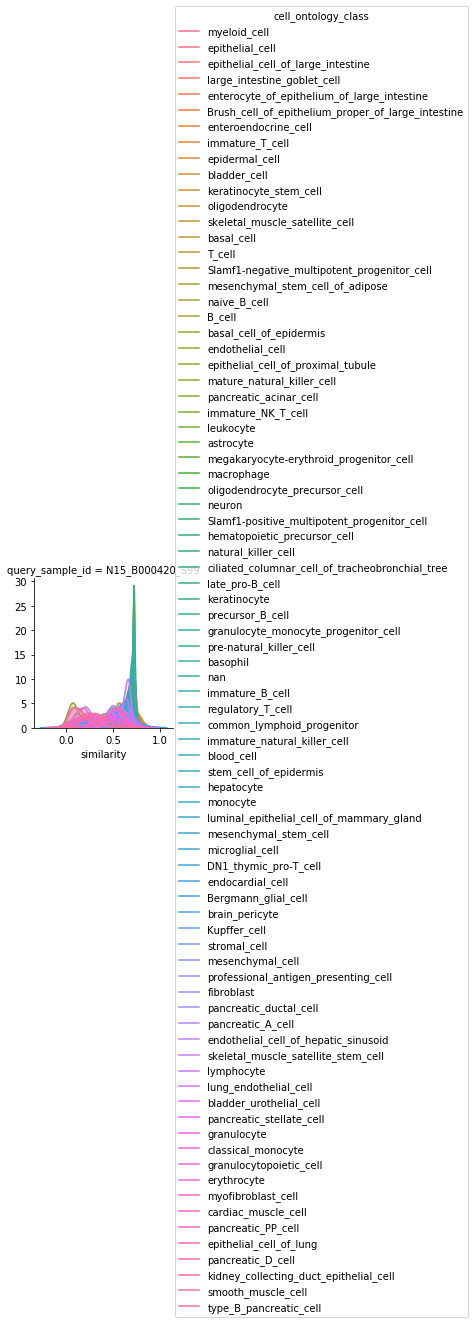

In [40]:
import seaborn as sns
%matplotlib inline

g = sns.FacetGrid(search_results_metadata_top, col='query_sample_id', hue='cell_ontology_class')
g.map(sns.kdeplot, 'similarity', shade=True)
g.add_legend()


In [41]:
search_results_metadata_top.groupby(['query_sample_id', 'cell_ontology_class']).median()

similarity
query_sample_id cell_ontology_class                                           
N15_B000420_S99 B_cell                                                0.566663
                Bergmann_glial_cell                                   0.485759
                Brush_cell_of_epithelium_proper_of_large_intestine    0.713756
                DN1_thymic_pro-T_cell                                 0.646869
                Kupffer_cell                                          0.588352
                Slamf1-negative_multipotent_progenitor_cell           0.698214
                Slamf1-positive_multipotent_progenitor_cell           0.706205
                T_cell                                                0.648122
                astrocyte                                             0.515632
                basal_cell                                            0.620083
                basal_cell_of_epidermis                               0.667281
                basophil                                              0.605963
                bladder_cell                                          0.642377
                bladder_urothelial_cell                               0.512872
                blood_cell                                            0.557746
                brain_pericyte                                        0.450561
                cardiac_muscle_cell                                   0.248697
                ciliated_columnar_cell_of_tracheobronchial_tree       0.494263
                classical_monocyte                                    0.441322
                common_lymphoid_progenitor                            0.715517
                endocardial_cell                                      0.622076
                endothelial_cell                                      0.530332
                endothelial_cell_of_hepatic_sinusoid                  0.649722
                enterocyte_of_epithelium_of_large_intestine           0.474582
                enteroendocrine_cell                                  0.691413
                epidermal_cell                                        0.665593
                epithelial_cell                                       0.657533
                epithelial_cell_of_large_intestine                    0.660334
                epithelial_cell_of_lung                               0.289130
                epithelial_cell_of_proximal_tubule                    0.439039
...                                                                        ...
                megakaryocyte-erythroid_progenitor_cell               0.713483
                mesenchymal_cell                                      0.557098
                mesenchymal_stem_cell                                 0.550747
                mesenchymal_stem_cell_of_adipose                      0.554789
                microglial_cell                                       0.501415
                monocyte                                              0.547458
                myeloid_cell                                          0.447264
                myofibroblast_cell                                    0.536275
                naive_B_cell                                          0.622808
                nan                                                   0.532980
                natural_killer_cell                                   0.607916
                neuron                                                0.470696
                oligodendrocyte                                       0.483509
                oligodendrocyte_precursor_cell                        0.669706
                pancreatic_A_cell                                     0.205259
                pancreatic_D_cell                                     0.315087
                pancreatic_PP_cell                                    0.188873
                pancreatic_acinar_cell                                0.094644
                pancreatic_ductal_cell 

## Look at median cell ontology per cell

In [104]:
median_cell_ontology = search_results_metadata_top.groupby(['query_sample_id', "cell_ontology_class"])['similarity'].median()
median_cell_ontology = median_cell_ontology.unstack()
median_cell_ontology = median_cell_ontology.T
print(median_cell_ontology.shape)
median_cell_ontology.head()

(82, 4)


query_sample_id                                     G4_B003570_S232  \
cell_ontology_class                                                   
B_cell                                                     0.583363   
Bergmann_glial_cell                                        0.498738   
Brush_cell_of_epithelium_proper_of_large_intestine         0.759176   
DN1_thymic_pro-T_cell                                      0.675051   
Kupffer_cell                                               0.608241   

query_sample_id                                     H7_B003588_S211  \
cell_ontology_class                                                   
B_cell                                                     0.606427   
Bergmann_glial_cell                                        0.517108   
Brush_cell_of_epithelium_proper_of_large_intestine         0.811287   
DN1_thymic_pro-T_cell                                      0.707071   
Kupffer_cell                                               0.633931   

query_sample_id                                     L5_B003588_S5  \
cell_ontology_class                                                 
B_cell                                                   0.608273   
Bergmann_glial_cell                                      0.517400   
Brush_cell_of_epithelium_proper_of_large_intestine       0.811162   
DN1_thymic_pro-T_cell                                    0.709580   
Kupffer_cell                                             0.634626   

query_sample_id                                     N15_B000420_S99  
cell_ontology_class                                                  
B_cell                                                     0.566663  
Bergmann_glial_cell                                        0.485759  
Brush_cell_of_epithelium_proper_of_large_intestine         0.713756  
DN1_thymic_pro-T_cell                                      0.646869  
Kupffer_cell                                               0.588352

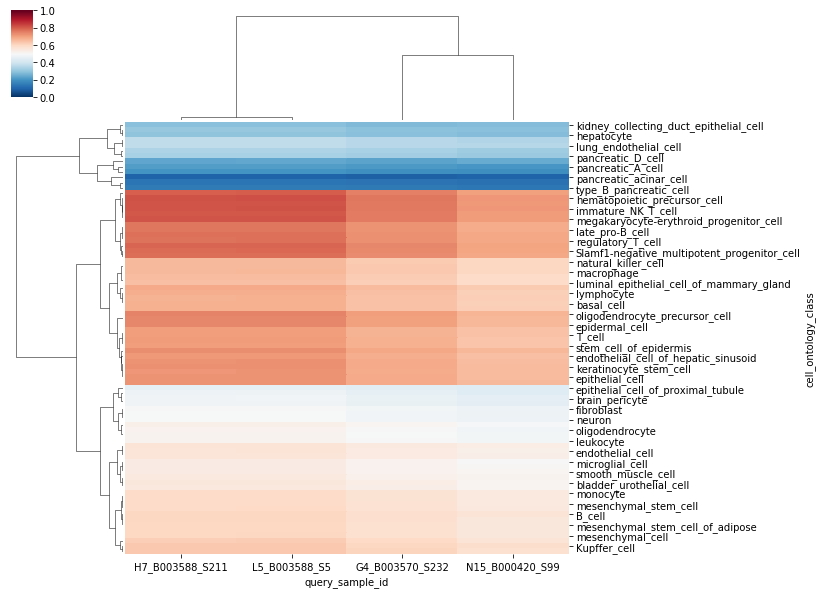

In [105]:
sns.clustermap(median_cell_ontology, cmap='RdBu_r', center=0.5, vmin=0, vmax=1)

`H7_B003588_S211` seems like a "good cell" that's similar to a lot of things

In [52]:
good_cell = "H7_B003588_S211"

search_results_metadata.query('query_sample_id == @good_cell').groupby('ignore_abundance').apply(lambda x: x.head())

similarity  \
ignore_abundance                      
False            512624    0.891271   
                 512625    0.889722   
                 512626    0.889588   
                 512627    0.888009   
                 512628    0.887346   
True             549240    0.012401   
                 549241    0.012195   
                 549242    0.012048   
                 549243    0.011980   
                 549244    0.011815   

                                                                                                                                                                                                            name  \
ignore_abundance                                                                                                                                                                                                   
False            512624                                                                                                                                                                 L12-MAA001865-3_38_F-1-1   
                 512625                                                                     cell_ontology_class:epithelial_cell|tissue:Trachea|subtissue:nan|free_annotation:nan|cell_id:J2-MAA001865-3_38_F-1-1   
                 512626                                                                                                                                                                     L5-D042475-3_9_M-1-1   
                 512627    cell_ontology_class:epithelial_cell_of_large_intestine|tissue:Large_Intestine|subtissue:Distal|free_annotation:Lgr5-_amplifying_undifferentiated_cell|cell_id:B7-MAA000870-3_10_M-1-1   
                 512628                                                                    cell_ontology_class:epithelial_cell|tissue:Trachea|subtissue:nan|free_annotation:nan|cell_id:O13-MAA001865-3_38_F-1-1   
True             549240             cell_ontology_class:epithelial_cell_of_large_intestine|tissue:Large_Intestine|subtissue:Proximal|free_annotation:Lgr5-_undifferentiated_cell|cell_id:F1-MAA000909-3_10_M-1-1   
                 549241             cell_ontology_class:epithelial_cell_of_large_intestine|tissue:Large_Intestine|subtissue:Proximal|free_annotation:Lgr5-_undifferentiated_cell|cell_id:E5-MAA000909-3_10_M-1-1   
                 549242              cell_ontology_class:epithelial_cell_of_large_intestine|tissue:Large_Intestine|subtissue:Proximal|free_annotation:Lgr5-_undifferentiated_cell|cell_id:P3-MAA000612-3_9_M-1-1   
                 549243  cell_ontology_class:epithelial_cell_of_large_intestine|tissue:Large_Intestine|subtissue:Proximal|free_annotation:Lgr5-_amplifying_undifferentiated_cell|cell_id:B3-MAA000871-3_11_M-1-1   
                 549244             cell_ontology_class:epithelial_cell_of_large_intestine|tissue:Large_Intestine|subtissue:Proximal|free_annotation:Lgr5-_undifferentiated_cell|cell_id:J8-MAA000909-3_10_M-1-1   

                                         filename  \
ignore_abundance                                    
False            512624  tabula-muris-k51-protein   
                 512625  tabula-muris-k51-protein   
                 512626  tabula-muris-k51-protein   
                 512627  tabula-muris-k51-protein   
                 512628  tabula-muris-k51-protein   
True             549240  tabula-muris-k51-protein   
                 549241  tabula-muris-k51-protein   
                 549242  tabula-muris-k51-protein   
                 549243  tabula-muris-k51-protein   
                 549244  tabula-muris-k51-protein   

                                                      md5  query_sample_id  \
ignore_abundance                                                             
False            512624  8ed1bcbf788adeb64c9ca50a651c8058  H7_B003588_S211   
                 512625  7204e7113d68c3bf08898ca38ba518cd  H7_B003588_S211   
                 512626  7dd0b9383b69726cc374fc0abb56d253  H7_

In [69]:
compute_samples.query('id == @good_cell')

id  \
4176  N15_B000420_S99   

                                                                                                                  read1  \
4176  s3://czbiohub-seqbot/fastqs/180516_A00111_0149_AH5CM2DSXX/rawdata/N15_B000420_S99/N15_B000420_S99_R1_001.fastq.gz   

                                                                                                                  read2  \
4176  s3://czbiohub-seqbot/fastqs/180516_A00111_0149_AH5CM2DSXX/rawdata/N15_B000420_S99/N15_B000420_S99_R2_001.fastq.gz   

                 name  \
4176  N15_B000420_S99   

                                                                   output  \
4176  s3://olgabot-maca/lung_cancer/sourmash_v4/N15_B000420_S99.signature   

      trim_low_abundance_kmers   dna  protein       ksizes  scaled  
4176                      True  True     True  21,27,33,51    1000

In [71]:
! aws s3 ls --human-readable s3://czbiohub-seqbot/fastqs/180516_A00111_0149_AH5CM2DSXX/rawdata/N15_B000420_S99/

2018-05-19 02:03:10  428.9 MiB N15_B000420_S99_R1_001.fastq.gz
2018-05-19 02:03:10  458.1 MiB N15_B000420_S99_R2_001.fastq.gz


In [48]:
search_results_metadata.query('query_sample_id == @good_cell')

UndefinedVariableError: local variable 'good_cell' is not defined

`D1_B003125_S25` seems like a weird bad cell that's not similar to anything

In [75]:
bad_cell = "D1_B003125_S25"
search_results_metadata.query('query_sample_id == @bad_cell').head()

similarity  \
36508    0.316674   
36509    0.308141   
36510    0.307184   
36511    0.304018   
36512    0.302058   

                                                                                                                    name  \
36508            cell_ontology_class:T_cell|tissue:Fat|subtissue:MAT|free_annotation:nan|cell_id:G16-MAA000914-3_9_M-1-1   
36509            cell_ontology_class:T_cell|tissue:Fat|subtissue:MAT|free_annotation:nan|cell_id:E11-MAA000914-3_9_M-1-1   
36510            cell_ontology_class:T_cell|tissue:Fat|subtissue:MAT|free_annotation:nan|cell_id:D12-MAA000914-3_9_M-1-1   
36511  cell_ontology_class:endothelial_cell|tissue:Fat|subtissue:MAT|free_annotation:nan|cell_id:D17-MAA000914-3_9_M-1-1   
36512            cell_ontology_class:T_cell|tissue:Fat|subtissue:MAT|free_annotation:nan|cell_id:H14-MAA000914-3_9_M-1-1   

                       filename                               md5  \
36508  tabula-muris-k51-protein  7eaedc3ea86056aca4353152544cfff4   
36509  tabula-muris-k51-protein  9c2251f947b9a9faf1cad898f2b1a0a1   
36510  tabula-muris-k51-protein  942b9c25aed5b57d64572cdcbd8d3343   
36511  tabula-muris-k51-protein  5e9de85eef4edef22566bb3eb1efc23b   
36512  tabula-muris-k51-protein  2e4adc68cd4fd8e1c6119571c859ca71   

      query_sample_id ignore_abundance                  cell_id  \
36508  D1_B003125_S25            False  G16-MAA000914-3_9_M-1-1   
36509  D1_B003125_S25            False  E11-MAA000914-3_9_M-1-1   
36510  D1_B003125_S25            False  D12-MAA000914-3_9_M-1-1   
36511  D1_B003125_S25            False  D17-MAA000914-3_9_M-1-1   
36512  D1_B003125_S25            False  H14-MAA000914-3_9_M-1-1   

      cell_ontology_class free_annotation subtissue tissue  \
36508              T_cell             nan       MAT    Fat   
36509              T_cell             nan       MAT    Fat   
36510              T_cell             nan       MAT    Fat   
36511    endothelial_cell             nan       MAT    Fat   
36512              T_cell             nan       MAT    Fat   

      cell_ontology_free_annotation  
36508                  T_cell (nan)  
36509                  T_cell (nan)  
36510                  T_cell (nan)  
36511        endothelial_cell (nan)  
36512                  T_cell (nan)

In [80]:
import os

s3_folder = os.path.dirname(compute_samples.query('id == @bad_cell').read1.iloc[0])
s3_folder

's3://czbiohub-seqbot/fastqs/180516_A00111_0149_AH5CM2DSXX/rawdata/D1_B003125_S25'

In [81]:
! aws s3 ls --human-readable $s3_folder/

2018-05-19 01:40:55    3.6 MiB D1_B003125_S25_R1_001.fastq.gz
2018-05-19 01:40:55    3.4 MiB D1_B003125_S25_R2_001.fastq.gz


In [82]:
median_cell_ontology = median_cell_ontology.sort_values(by=median_cell_ontology.columns.tolist(), ascending=False)
median_cell_ontology.head()

query_sample_id                              C14_B003528_S62  D1_B003125_S25  \
cell_ontology_class                                                            
immature_NK_T_cell                                  0.489671        0.081454   
hematopoietic_precursor_cell                        0.489312        0.094412   
common_lymphoid_progenitor                          0.487614        0.093546   
megakaryocyte-erythroid_progenitor_cell             0.487044        0.086246   
Slamf1-positive_multipotent_progenitor_cell         0.484603        0.089020   

query_sample_id                              E19_B003570_S199  \
cell_ontology_class                                             
immature_NK_T_cell                                   0.531909   
hematopoietic_precursor_cell                         0.531986   
common_lymphoid_progenitor                           0.530214   
megakaryocyte-erythroid_progenitor_cell              0.529047   
Slamf1-positive_multipotent_progenitor_cell          0.526801   

query_sample_id                              F21_B000420_S213  \
cell_ontology_class                                             
immature_NK_T_cell                                   0.201089   
hematopoietic_precursor_cell                         0.202774   
common_lymphoid_progenitor                           0.201919   
megakaryocyte-erythroid_progenitor_cell              0.201085   
Slamf1-positive_multipotent_progenitor_cell          0.200457   

query_sample_id                              G10_B003586_S142  \
cell_ontology_class                                             
immature_NK_T_cell                                   0.026166   
hematopoietic_precursor_cell                         0.022128   
common_lymphoid_progenitor                           0.011768   
megakaryocyte-erythroid_progenitor_cell              0.015556   
Slamf1-positive_multipotent_progenitor_cell          0.012634   

query_sample_id                              G4_B003570_S232  G9_B003511_S57  \
cell_ontology_class                                                            
immature_NK_T_cell                                  0.763492        0.019581   
hematopoietic_precursor_cell                        0.766675        0.015585   
common_lymphoid_progenitor                          0.762895        0.009071   
megakaryocyte-erythroid_progenitor_cell             0.761553        0.011959   
Slamf1-positive_multipotent_progenitor_cell         0.751707        0.009922   

query_sample_id                              H7_B003588_S211  I22_B002095_S22  \
cell_ontology_class                                                             
immature_NK_T_cell                                  0.814876         0.576287   
hematopoietic_precursor_cell                        0.820098         0.576262   
common_lymphoid_progenitor                          0.815076         0.575333   
megakaryocyte-erythroid_progenitor_cell             0.812711         0.573717   
Slamf1-positive_multipotent_progenitor_cell         0.800492         0.570681   

query_sample_id                              I3_B003573_S63  J11_B003573_S95  \
cell_ontology_class                                                            
immature_NK_T_cell                                 0.474187         0.455872   
hematopoietic_precursor_cell                       0.473876         0.455537   
common_lymphoid_progenitor                         0.467343         0.454333   
megakaryocyte-erythroid_progenitor_cell            0.470208         0.453169   
Slamf1-positive_multipotent_progenitor_cell        0.465290         0.451299   

query_sample_id                              J8_B003528_S224  K7_B002073_S103  \
cell_ontology_class                                                             
immature_NK_T_cell                                  0.689469         0.560059   
hematopoietic_precursor_cell                        0.691004         0.561487   
common_lymphoid_progenitor                          0.687

In [46]:
median_cell_ontology = median_cell_ontology.sort_values(by=median_cell_ontology.index.tolist(), axis=1, ascending=False)
median_cell_ontology.head()

query_sample_id                              L5_B003588_S5  H7_B003588_S211  \
cell_ontology_class                                                           
immature_NK_T_cell                                0.816970         0.814876   
hematopoietic_precursor_cell                      0.820904         0.820098   
common_lymphoid_progenitor                        0.816200         0.815076   
megakaryocyte-erythroid_progenitor_cell           0.814002         0.812711   
Slamf1-positive_multipotent_progenitor_cell       0.801614         0.800492   

query_sample_id                              G4_B003570_S232  N15_B000420_S99  \
cell_ontology_class                                                             
immature_NK_T_cell                                  0.763492         0.718876   
hematopoietic_precursor_cell                        0.766675         0.719653   
common_lymphoid_progenitor                          0.762895         0.715517   
megakaryocyte-erythroid_progenitor_cell             0.761553         0.713483   
Slamf1-positive_multipotent_progenitor_cell         0.751707         0.706205   

query_sample_id                              J8_B003528_S224  \
cell_ontology_class                                            
immature_NK_T_cell                                  0.689469   
hematopoietic_precursor_cell                        0.691004   
common_lymphoid_progenitor                          0.687973   
megakaryocyte-erythroid_progenitor_cell             0.686114   
Slamf1-positive_multipotent_progenitor_cell         0.679635   

query_sample_id                              P14_B000420_S146  \
cell_ontology_class                                             
immature_NK_T_cell                                   0.675564   
hematopoietic_precursor_cell                         0.676626   
common_lymphoid_progenitor                           0.673421   
megakaryocyte-erythroid_progenitor_cell              0.672136   
Slamf1-positive_multipotent_progenitor_cell          0.665803   

query_sample_id                              L16_B003588_S16  O3_B003573_S207  \
cell_ontology_class                                                             
immature_NK_T_cell                                  0.674663         0.604526   
hematopoietic_precursor_cell                        0.675714         0.604876   
common_lymphoid_progenitor                          0.672955         0.602890   
megakaryocyte-erythroid_progenitor_cell             0.671015         0.601530   
Slamf1-positive_multipotent_progenitor_cell         0.665763         0.596910   

query_sample_id                              M1_B000420_S61  I22_B002095_S22  \
cell_ontology_class                                                            
immature_NK_T_cell                                 0.591577         0.576287   
hematopoietic_precursor_cell                       0.592857         0.576262   
common_lymphoid_progenitor                         0.588563         0.575333   
megakaryocyte-erythroid_progenitor_cell            0.586568         0.573717   
Slamf1-positive_multipotent_progenitor_cell        0.582748         0.570681   

query_sample_id                              K7_B002073_S103  \
cell_ontology_class                                            
immature_NK_T_cell                                  0.560059   
hematopoietic_precursor_cell                        0.561487   
common_lymphoid_progenitor                          0.558502   
megakaryocyte-erythroid_progenitor_cell             0.556734   
Slamf1-positive_multipotent_progenitor_cell         0.553334   

query_sample_id                              E19_B003570_S199  \
cell_ontology_class                                             
immature_NK_T_cell                                   0.531909   
hematopoietic_precursor_cell                         0.531986   
common_lymphoid_progenitor                           0.530214   
megakaryocyte-erythroid_progenitor_cell              0.529047   
Slamf

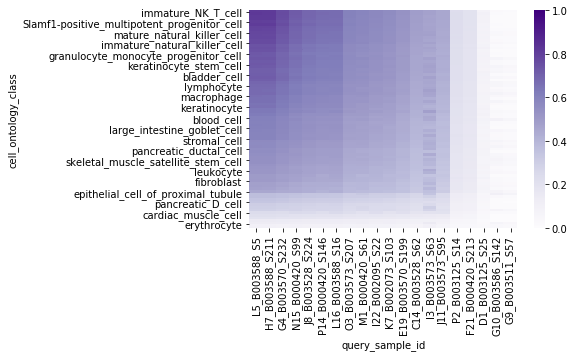

In [51]:
sns.heatmap(median_cell_ontology, cmap='Purples', vmax=1, vmin=0)

In [56]:
import matplotlib.pyplot as plt

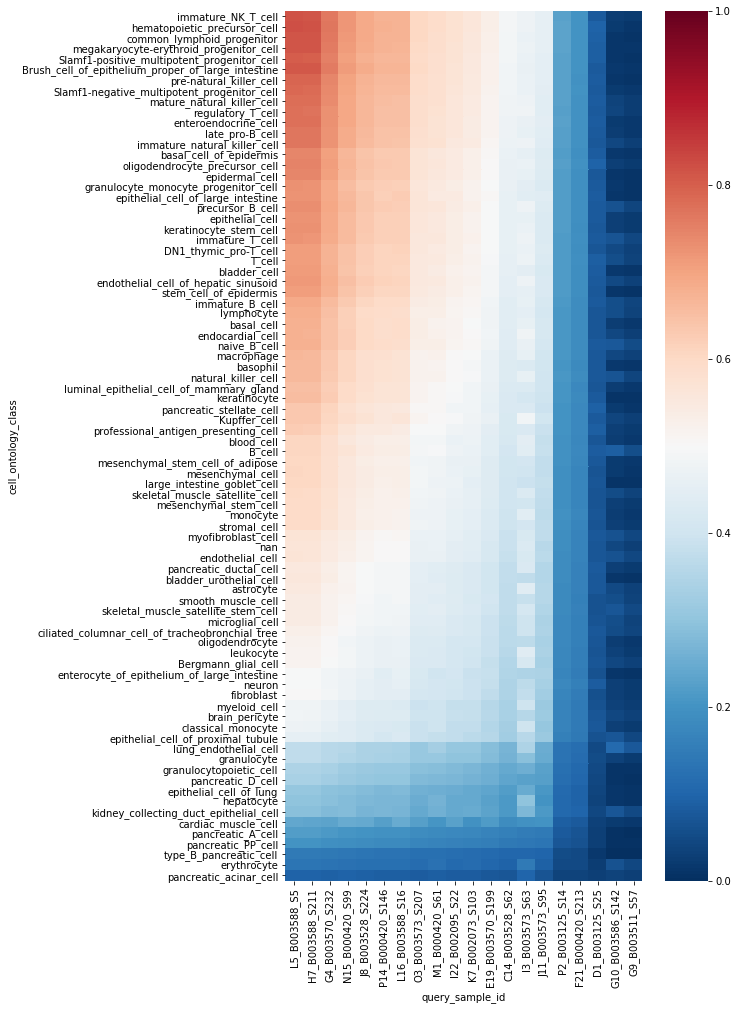

In [61]:
fig, ax = plt.subplots(figsize=(8, 16))
sns.heatmap(median_cell_ontology, cmap='RdBu_r', vmax=1, vmin=0, center=0.5, 
            yticklabels=median_cell_ontology.index, xticklabels=median_cell_ontology.columns)

In [ ]:
si

In [120]:
read1s = compute_samples.query('id in @search_results_metadata.query_sample_id').read1.unique()
# print(read1s)
for read1 in read1s:
    ! aws s3 ls --human-readable $read1

['s3://czbiohub-seqbot/fastqs/180516_A00111_0149_AH5CM2DSXX/rawdata/C14_B003528_S62/C14_B003528_S62_R1_001.fastq.gz'
 's3://czbiohub-seqbot/fastqs/180516_A00111_0149_AH5CM2DSXX/rawdata/D1_B003125_S25/D1_B003125_S25_R1_001.fastq.gz'
 's3://czbiohub-seqbot/fastqs/180516_A00111_0149_AH5CM2DSXX/rawdata/E19_B003570_S199/E19_B003570_S199_R1_001.fastq.gz'
 's3://czbiohub-seqbot/fastqs/180516_A00111_0149_AH5CM2DSXX/rawdata/F21_B000420_S213/F21_B000420_S213_R1_001.fastq.gz'
 's3://czbiohub-seqbot/fastqs/180516_A00111_0149_AH5CM2DSXX/rawdata/G10_B003586_S142/G10_B003586_S142_R1_001.fastq.gz'
 's3://czbiohub-seqbot/fastqs/180516_A00111_0149_AH5CM2DSXX/rawdata/G4_B003570_S232/G4_B003570_S232_R1_001.fastq.gz'
 's3://czbiohub-seqbot/fastqs/180516_A00111_0149_AH5CM2DSXX/rawdata/G9_B003511_S57/G9_B003511_S57_R1_001.fastq.gz'
 's3://czbiohub-seqbot/fastqs/180516_A00111_0149_AH5CM2DSXX/rawdata/H7_B003588_S211/H7_B003588_S211_R1_001.fastq.gz'
 's3://czbiohub-seqbot/fastqs/180516_A00111_0149_AH5CM2DSXX/ra

In [126]:
lines = []

for read1 in read1s:
    line = ! aws s3 ls $read1
    lines.append(line[0])

In [127]:
lines

['2018-05-19 01:37:38  185854171 C14_B003528_S62_R1_001.fastq.gz',
 '2018-05-19 01:40:55    3727319 D1_B003125_S25_R1_001.fastq.gz',
 '2018-05-19 01:26:08   50433901 E19_B003570_S199_R1_001.fastq.gz',
 '2018-05-19 01:54:14   16480016 F21_B000420_S213_R1_001.fastq.gz',
 '2018-05-19 01:57:30    3629973 G10_B003586_S142_R1_001.fastq.gz',
 '2018-05-19 01:34:57  127483386 G4_B003570_S232_R1_001.fastq.gz',
 '2018-05-19 01:54:29   12458701 G9_B003511_S57_R1_001.fastq.gz',
 '2018-05-19 01:58:25  193557449 H7_B003588_S211_R1_001.fastq.gz',
 '2018-05-19 01:46:05  117369098 I22_B002095_S22_R1_001.fastq.gz',
 '2018-05-19 01:41:06    7641874 I3_B003573_S63_R1_001.fastq.gz',
 '2018-05-19 01:41:30  227584576 J11_B003573_S95_R1_001.fastq.gz',
 '2018-05-19 01:56:36   80303430 J8_B003528_S224_R1_001.fastq.gz',
 '2018-05-19 02:02:25  139783039 K7_B002073_S103_R1_001.fastq.gz',
 '2018-05-19 02:00:04  280371146 L16_B003588_S16_R1_001.fastq.gz',
 '2018-05-19 02:01:51   88423984 L5_B003588_S5_R1_001.fastq.gz

In [135]:
read1_txt = '\n'.join(lines)

read1_txt

'2018-05-19 01:37:38  185854171 C14_B003528_S62_R1_001.fastq.gz\n2018-05-19 01:40:55    3727319 D1_B003125_S25_R1_001.fastq.gz\n2018-05-19 01:26:08   50433901 E19_B003570_S199_R1_001.fastq.gz\n2018-05-19 01:54:14   16480016 F21_B000420_S213_R1_001.fastq.gz\n2018-05-19 01:57:30    3629973 G10_B003586_S142_R1_001.fastq.gz\n2018-05-19 01:34:57  127483386 G4_B003570_S232_R1_001.fastq.gz\n2018-05-19 01:54:29   12458701 G9_B003511_S57_R1_001.fastq.gz\n2018-05-19 01:58:25  193557449 H7_B003588_S211_R1_001.fastq.gz\n2018-05-19 01:46:05  117369098 I22_B002095_S22_R1_001.fastq.gz\n2018-05-19 01:41:06    7641874 I3_B003573_S63_R1_001.fastq.gz\n2018-05-19 01:41:30  227584576 J11_B003573_S95_R1_001.fastq.gz\n2018-05-19 01:56:36   80303430 J8_B003528_S224_R1_001.fastq.gz\n2018-05-19 02:02:25  139783039 K7_B002073_S103_R1_001.fastq.gz\n2018-05-19 02:00:04  280371146 L16_B003588_S16_R1_001.fastq.gz\n2018-05-19 02:01:51   88423984 L5_B003588_S5_R1_001.fastq.gz\n2018-05-19 02:01:41   36450167 M1_B000420

In [137]:
from io import StringIO

read1_aws_s3_ls = pd.read_table(StringIO(read1_txt), delim_whitespace=True, header=None, 
                          names=['date', 'time', 'bytes', 'basename'])
read1_aws_s3_ls['sample_id'] = read1_sizes['basename'].str.split('_R1').str[0]
read1_aws_s3_ls = read1_aws_s3_ls.set_index('sample_id')
read1_aws_s3_ls

date      time      bytes  \
sample_id                                           
C14_B003528_S62   2018-05-19  01:37:38  185854171   
D1_B003125_S25    2018-05-19  01:40:55    3727319   
E19_B003570_S199  2018-05-19  01:26:08   50433901   
F21_B000420_S213  2018-05-19  01:54:14   16480016   
G10_B003586_S142  2018-05-19  01:57:30    3629973   
G4_B003570_S232   2018-05-19  01:34:57  127483386   
G9_B003511_S57    2018-05-19  01:54:29   12458701   
H7_B003588_S211   2018-05-19  01:58:25  193557449   
I22_B002095_S22   2018-05-19  01:46:05  117369098   
I3_B003573_S63    2018-05-19  01:41:06    7641874   
J11_B003573_S95   2018-05-19  01:41:30  227584576   
J8_B003528_S224   2018-05-19  01:56:36   80303430   
K7_B002073_S103   2018-05-19  02:02:25  139783039   
L16_B003588_S16   2018-05-19  02:00:04  280371146   
L5_B003588_S5     2018-05-19  02:01:51   88423984   
M1_B000420_S61    2018-05-19  02:01:41   36450167   
N15_B000420_S99   2018-05-19  02:03:10  449690564   
O3_B003573_S207   2018-05-19  02:03:10  153110411   
P14_B000420_S146  2018-05-19  02:12:03  255623110   
P2_B003125_S14    2018-05-19  02:12:49   61431977   

                                          basename  
sample_id                                           
C14_B003528_S62    C14_B003528_S62_R1_001.fastq.gz  
D1_B003125_S25      D1_B003125_S25_R1_001.fastq.gz  
E19_B003570_S199  E19_B003570_S199_R1_001.fastq.gz  
F21_B000420_S213  F21_B000420_S213_R1_001.fastq.gz  
G10_B003586_S142  G10_B003586_S142_R1_001.fastq.gz  
G4_B003570_S232    G4_B003570_S232_R1_001.fastq.gz  
G9_B003511_S57      G9_B003511_S57_R1_001.fastq.gz  
H7_B003588_S211    H7_B003588_S211_R1_001.fastq.gz  
I22_B002095_S22    I22_B002095_S22_R1_001.fastq.gz  
I3_B003573_S63      I3_B003573_S63_R1_001.fastq.gz  
J11_B003573_S95    J11_B003573_S95_R1_001.fastq.gz  
J8_B003528_S224    J8_B003528_S224_R1_001.fastq.gz  
K7_B002073_S103    K7_B002073_S103_R1_001.fastq.gz  
L16_B003588_S16    L16_B003588_S16_R1_001.fastq.gz  
L5_B003588_S5        L5_B003588_S5_R1_001.fastq.gz  
M1_B000420_S61      M1_B000420_S61_R1_001.fastq.gz  
N15_B000420_S99    N15_B000420_S99_R1_001.fastq.gz  
O3_B003573_S207    O3_B003573_S207_R1_001.fastq.gz  
P14_B000420_S146  P14_B000420_S146_R1_001.fastq.gz  
P2_B003125_S14      P2_B003125_S14_R1_001.fastq.gz

In [139]:
read1_sizes = read1_aws_s3_ls['bytes']
read1_sizes = read1_sizes.sort_values()
read1_sizes

sample_id
G10_B003586_S142      3629973
D1_B003125_S25        3727319
I3_B003573_S63        7641874
G9_B003511_S57       12458701
F21_B000420_S213     16480016
M1_B000420_S61       36450167
E19_B003570_S199     50433901
P2_B003125_S14       61431977
J8_B003528_S224      80303430
L5_B003588_S5        88423984
I22_B002095_S22     117369098
G4_B003570_S232     127483386
K7_B002073_S103     139783039
O3_B003573_S207     153110411
C14_B003528_S62     185854171
H7_B003588_S211     193557449
J11_B003573_S95     227584576
P14_B000420_S146    255623110
L16_B003588_S16     280371146
N15_B000420_S99     449690564
Name: bytes, dtype: int64

In [133]:
search_results_metadata.head()

similarity  \
0    0.500983   
1    0.500967   
2    0.500855   
3    0.500827   
4    0.500819   

                                                                                                                                                                                      name  \
0                                                                             cell_ontology_class:myeloid_cell|tissue:Fat|subtissue:MAT|free_annotation:nan|cell_id:H11-B002314-3_56_F-1-1   
1  cell_ontology_class:epithelial_cell_of_large_intestine|tissue:Large_Intestine|subtissue:Proximal|free_annotation:Lgr5-_amplifying_undifferentiated_cell|cell_id:H6-MAA001871-3_39_F-1-1   
2                         cell_ontology_class:large_intestine_goblet_cell|tissue:Large_Intestine|subtissue:Proximal|free_annotation:Goblet_cell_(Proximal)|cell_id:M4-MAA001872-3_39_F-1-1   
3                         cell_ontology_class:large_intestine_goblet_cell|tissue:Large_Intestine|subtissue:Proximal|free_annotation:Goblet_cell_(Proximal)|cell_id:E6-MAA001872-3_39_F-1-1   
4                        cell_ontology_class:large_intestine_goblet_cell|tissue:Large_Intestine|subtissue:Proximal|free_annotation:Goblet_cell_(Proximal)|cell_id:L12-MAA001872-3_39_F-1-1   

                   filename                               md5  \
0  tabula-muris-k51-protein  3117952b86d451cb92e6336531316c17   
1  tabula-muris-k51-protein  3c5b05b218dc4bfdc197426bc838fed8   
2  tabula-muris-k51-protein  64ef4f62c0d0b1377c2cbf5f135f314f   
3  tabula-muris-k51-protein  e4a3ceeaeff81c54fe23210e460e6ded   
4  tabula-muris-k51-protein  a8a5aa310cbb862741fc88fac1052c32   

   query_sample_id ignore_abundance                   cell_id  \
0  C14_B003528_S62            False    H11-B002314-3_56_F-1-1   
1  C14_B003528_S62            False   H6-MAA001871-3_39_F-1-1   
2  C14_B003528_S62            False   M4-MAA001872-3_39_F-1-1   
3  C14_B003528_S62            False   E6-MAA001872-3_39_F-1-1   
4  C14_B003528_S62            False  L12-MAA001872-3_39_F-1-1   

                  cell_ontology_class                         free_annotation  \
0                        myeloid_cell                                     nan   
1  epithelial_cell_of_large_intestine  Lgr5-_amplifying_undifferentiated_cell   
2         large_intestine_goblet_cell                            Goblet_cell_   
3         large_intestine_goblet_cell                            Goblet_cell_   
4         large_intestine_goblet_cell                            Goblet_cell_   

  subtissue           tissue  \
0       MAT              Fat   
1  Proximal  Large_Intestine   
2  Proximal  Large_Intestine   
3  Proximal  Large_Intestine   
4  Proximal  Large_Intestine   

                                                 cell_ontology_free_annotation  
0                                                           myeloid_cell (nan)  
1  epithelial_cell_of_large_intestine (Lgr5-_amplifying_undifferentiated_cell)  
2                                   large_intestine_goblet_cell (Goblet_cell_)  
3                                   large_intestine_goblet_cell (Goblet_cell_)  
4                                   large_intestine_goblet_cell (Goblet_cell_)

/home/ubuntu/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


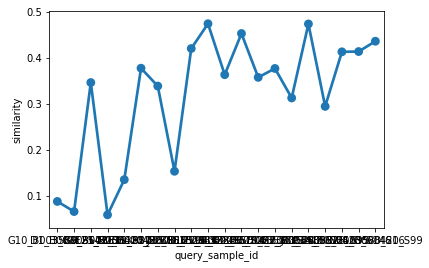

In [143]:
sns.pointplot(x='query_sample_id', y='similarity',
              order=read1_sizes.index, data=search_results_metadata)

In [147]:
# g = sns.FacetGrid(search_results_metadata, row='query_sample_id', 
#                   row_order=read1_sizes.index, aspect=2, height=1.5)
# g.map(sns.distplot, 'similarity')

/home/ubuntu/anaconda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/ubuntu/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


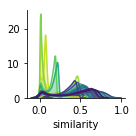

In [152]:
import seaborn as sns
%matplotlib inline

g = sns.FacetGrid(search_results, hue='query_sample_id', 
                  hue_order=read1_sizes.index, palette='viridis_r', size=2)
g.map(sns.kdeplot, 'similarity', shade=True)
g.savefig('../figures/ashley_lung_cancer_similarity_distribution_per_cell_showing_seq_depth.pdf')

In [129]:
filename = "/Users/olgabot/Downloads/ashley_lung_cancer_search.parquet"

search_results_metadata.to_parquet(filename)
! ls -lha $filename

ImportError: Unable to find a usable engine; tried using: 'pyarrow', 'fastparquet'.
pyarrow or fastparquet is required for parquet support

## Commit the changes in a branch so you can see them after your instance is gone

